**AI-Agent For Trading Strategy Implementation: From Concept to Execution and Reflection**



This AI agent not only creates trading strategies but also validates, executes, and improves them—all in one seamless flow.

Built with a powerful stack including LangGraph and Codestral, this agent combines robustness and adaptability to deliver accurate and optimized trading strategies.



--



👉  What does this agent bring to the table?



1️⃣ Strategy Generation: Leveraging Codestral, the agent produces detailed trading strategies such as momentum or RSI-based models, with precise logic and indicators like moving averages.



2️⃣ Code Execution & Validation: With LangGraph managing the workflow, the agent tests the generated code, identifying and fixing errors like incorrect data handling or execution issues.



3️⃣ Reflection & Iterative Improvement: After running the strategy, the agent reflects on its implementation, identifying areas for optimization and adapting accordingly.



--



👉 The Tech Stack:



1️⃣ LangGraph: For managing workflows, state transitions, and iterative refinement.



2️⃣ Codestral: For generating structured Python code tailored to specific trading strategies.



--



👉 An Example in Action:

The agent implemented a momentum trading strategy using RSI and moving averages.

It detected errors during execution (Ex: Cannot set a DataFrame with multiple columns to the single column Strategy_Returns), corrected the logic, and produced accurate strategy returns—all autonomously.



--



👉Key Takeways:



1️⃣ End-to-End Strategy Workflow: The AI agent handles the entire lifecycle of a trading strategy, from generating the idea, implementing it as code, testing for accuracy, and refining the approach through reflection.



2️⃣ Powerful Tech Stack: Using tools like LangGraph for workflow management, Codestral for structured code generation, this agent ensures efficient and accurate execution.



3️⃣ Adaptive Problem-Solving: The agent learns from errors, adapts strategies, and continuously improves.



4️⃣ Clarity in Instructions is Key: Providing precise and clear instructions is crucial, especially during the reflection phase, to ensure accurate analysis and meaningful improvements.



[Hanane Dupouy](https://www.linkedin.com/in/hanane-d-algo-trader/)

In [ ]:
! pip install -U langchain_community langchain-mistralai langchain langgraph -q

In [2]:
from langchain_mistralai import ChatMistralAI
from pydantic import BaseModel, Field

In [50]:
from google.colab import userdata
MISTRAL_API_KEY = userdata.get('MISTRAL_API_KEY')

In [78]:
mistral_model = "codestral-latest"
llm_codestral = ChatMistralAI(model=mistral_model, temperature=0,api_key = MISTRAL_API_KEY)

# Codestral chain: Pydantic BaseModel

In [98]:
# Data model
class codeGenerate(BaseModel):
    """Schema for code solutions to questions about LCEL."""

    prefix: str = Field(description="Description of the strategy proposed and the various parameters used in it")
    imports: str = Field(description="Code block import statements")
    code: str = Field(description="Code block not including import statements")

# LLM
code_gen_mistral_chain = llm_codestral.with_structured_output(codeGenerate)

## Simple call to check:

In [ ]:
# Test
question = "Propose a momentum trading strategy."
messages = [("user", question)]

result = code_gen_mistral_chain.invoke(messages)

print("**************Prefix:**************")
print(result.prefix)
print("\n**************Imports:**************")
print(result.imports)
print("\n**************Code:**************")
print(result.code)

**************Prefix:**************
A momentum trading strategy involves identifying trends in the market and making trades based on the assumption that the trend will continue. This strategy typically uses indicators such as moving averages and relative strength index (RSI) to identify potential entry and exit points. The strategy involves the following steps: 1. Calculate the moving averages (e.g., 50-day and 200-day) to identify the trend. 2. Use the RSI to determine overbought or oversold conditions. 3. Generate buy signals when the price crosses above the 50-day moving average and the RSI is below 70. 4. Generate sell signals when the price crosses below the 50-day moving average and the RSI is above 30. 5. Implement stop-loss and take-profit levels to manage risk and lock in profits.

**************Imports:**************
import pandas as pd
import numpy as np
import yfinance as yfin
import matplotlib.pyplot as plt

**************Code:**************
def momentum_trading_strategy(t

In [ ]:
question = "Propose RSI trading strategy implementation."
messages = [("user", question)]
# Test
result = code_gen_mistral_chain.invoke(messages)
result

code(prefix='The RSI (Relative Strength Index) trading strategy involves calculating the RSI of a security over a specified period and using it to identify overbought or oversold conditions. When the RSI is above 70, it is considered overbought, and when it is below 30, it is considered oversold. The strategy involves buying when the RSI is oversold and selling when it is overbought. This strategy is implemented using the `pandas` library for data manipulation and `yfinance` for fetching historical stock data.', imports='import pandas as pd\nimport yfinance as yf\nimport numpy as np', code="def calculate_rsi(data, period=14):\n    delta = data['Close'].diff(1)\n    gain = (delta.where(delta > 0, 0)).fillna(0)\n    loss = (-delta.where(delta < 0, 0)).fillna(0)\n    avg_gain = gain.rolling(window=period).mean()\n    avg_loss = loss.rolling(window=period).mean()\n    rs = avg_gain / avg_loss\n    rsi = 100 - (100 / (1 + rs))\n    return rsi\n\ndef rsi_trading_strategy(ticker, start_date, 

In [ ]:
print("**************Prefix:**************")
print(result.prefix)
print("\n**************Imports:**************")
print(result.imports)
print("\n**************Code:**************")
print(result.code)

**************Prefix:**************
The RSI (Relative Strength Index) trading strategy involves calculating the RSI of a security over a specified period and using it to identify overbought or oversold conditions. When the RSI is above 70, it is considered overbought, and when it is below 30, it is considered oversold. The strategy involves buying when the RSI is oversold and selling when it is overbought. This strategy is implemented using the `pandas` library for data manipulation and `yfinance` for fetching historical stock data.

**************Imports:**************
import pandas as pd
import yfinance as yf
import numpy as np

**************Code:**************
def calculate_rsi(data, period=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + r

# Graph

## State

In [99]:
from typing import Annotated
from typing import Dict, TypedDict, List
from langgraph.graph.message import AnyMessage, add_messages

class GraphState(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        error : Binary flag for control flow to indicate whether test error was tripped
        messages : With user question, error messages, reasoning
        generation : Code solution
        iterations : Number of tries
        reflection : Binary flag for control flow to indicate whether code was reflected
        not_reflect_anymore : Binary flag for control flow to indicate whether we want to continue with reflection or not
    """

    error: str
    messages: Annotated[list[AnyMessage], add_messages]
    generation: str
    iterations: int
    reflection: str
    not_reflect_anymore: str

## Generate Trading Strategy Code, Check Code Execusion, Reflect on Stragey Implementation

In [100]:
from operator import itemgetter
# from langchain_core.pydantic_v1 import BaseModel, Field
from pydantic import BaseModel, Field
from langchain_core.runnables import RunnablePassthrough
from langchain_core.prompts import PromptTemplate

### Parameters
max_iterations = 6

### Nodes
def generate(state: GraphState):
    """
    Generate a code solution

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation
    """

    print("---GENERATING CODE SOLUTION---")

    # State
    messages = state["messages"]
    iterations = state["iterations"]
    error = state.get("error", "")
    reflection = state.get("reflection", "")
    not_reflect_anymore = state.get("not_reflect_anymore", "")

    # Solution
    code_solution = code_gen_mistral_chain.invoke(messages)
    messages += [
        (
            "assistant",
            f"Here is my attempt to implement your trading strategy: {code_solution.prefix} \n Imports: {code_solution.imports} \n Code: {code_solution.code}",
        )
    ]

    # Increment
    iterations = iterations + 1
    return {"generation": code_solution, "messages": messages, "iterations": iterations}

def code_check(state: GraphState):
    """
    Check code

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, error
    """

    print("---CHECKING CODE---")

    # State
    messages = state["messages"]
    code_solution = state["generation"]
    iterations = state["iterations"]

    # Get solution components
    prefix = code_solution.prefix
    imports = code_solution.imports
    code = code_solution.code

    # Check imports
    try:
        exec(imports)
    except Exception as e:
        print("---CODE IMPORT CHECK: FAILED---")
        error_message = [("user", f"Your solution failed the import test. Here is the error: {e}. Reflect on this error and your prior attempt to solve the problem. (1) State what you think went wrong with the prior solution and (2) try to solve this problem again. Return the FULL SOLUTION. Use the code tool to structure the output with a prefix, imports, and code block:")]
        messages += error_message
        return {
            "generation": code_solution,
            "messages": messages,
            "iterations": iterations,
            "error": "yes",
        }

    # Check execution
    try:
        combined_code = f"{imports}\n{code}"
        # Use a shared scope for exec
        global_scope = {}
        exec(combined_code, global_scope)
    except Exception as e:
        print("---CODE BLOCK CHECK: FAILED---")
        error_message = [("user", f"Your solution failed the code execution test: {e}) Reflect on this error and your prior attempt to solve the problem. (1) State what you think went wrong with the prior solution and (2) try to solve this problem again. Return the FULL SOLUTION. Use the code tool to structure the output with a prefix, imports, and code block:")]
        messages += error_message
        return {
            "generation": code_solution,
            "messages": messages,
            "iterations": iterations,
            "error": "yes",
        }

    # No errors
    print("---NO CODE TEST FAILURES---")
    return {
        "generation": code_solution,
        "messages": messages,
        "iterations": iterations,
        "error": "no",
    }



In [95]:
def code_reflection(state: GraphState):
    """
    Reflect on the quality of the strategy's code

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, error
    """

    print("---REFLECTING ON STRATEGY IMPLEMENTATION---")

    # State
    messages = state["messages"]
    code_solution = state["generation"]
    iterations = state["iterations"]
    not_reflect_anymore = state["not_reflect_anymore"]

    # Get solution components
    prefix = code_solution.prefix
    imports = code_solution.imports
    code = code_solution.code

    # Check execution
    combined_code = f"{imports}\n{code}"
    reflection_message = [("user", f"Reflect on the generated code to ensure the following:\
          (1) Accuracy of computations: Verify that all calculations (e.g., moving averages, differences between moving averages) are correct and align with the requested strategy.\
          (2) Buy and sell signals: Ensure that the signals are computed correctly, thresholds are respected, and the direction (buy or sell) is accurate.\
          (3) Improvements: If any enhancements are needed, propose a Python implementation.\
          (4) Answer by 'no reflection' only if there is no reflection on the code solution already provided which is clean and accurate, else return the explanation and the code reflected.  \
           Use the code tool to structure the output with a prefix, imports, and code block: \n Here is the code to reflect on: {code_solution}")]

    code_reflection = code_gen_mistral_chain.invoke(reflection_message)
    if code_reflection =="no reflection":
        return {
            "generation": code_solution,
            "messages": messages,
            "iterations": iterations,
            "reflection": "no",
            "not_reflect_anymore":"yes"
        }
    else:
        messages += [
        (
            "assistant",
            f"Here is my attempt to reflect on the strategy implementation: {code_reflection.prefix} \n Imports: {code_reflection.imports} \n Code: {code_reflection.code}",
        )
        ]
        return {"generation": code_reflection, "messages": messages, "iterations": iterations, "reflection": "yes","not_reflect_anymore":"yes"}

## Conditional Edges

In [108]:
### Conditional edges

def decide_to_reflect_or_finish(state: GraphState):
    """
    Determines whether to finish.

    Args:
        state (dict): The current graph state

    Returns:
        str: Next node to call
    """
    error = state["error"]
    iterations = state["iterations"]
    not_reflect_anymore = state["not_reflect_anymore"]

    if (error == "no" and not_reflect_anymore == "no") or iterations == max_iterations:
        print("---DECISION: REFLECTION---")
        return "reflect_strategy_implementation"
    elif (error == "no" and not_reflect_anymore == "yes") or iterations == max_iterations:
        print("---DECISION: END AFTER REFLECTION + CODE_CHECK ---")
        return "end"
    else:
        print("---DECISION: RE-TRY GENERATE CODE---")
        return "generate_trading_strategy"

def decide_to_finish_from_reflect(state: GraphState):
    """
    Determines whether to finish.

    Args:
        state (dict): The current graph state

    Returns:
        str: Next node to call
    """
    error = state["error"]
    iterations = state["iterations"]
    reflection = state["reflection"]

    if reflection == "no" or iterations == max_iterations:
        print("---DECISION: END with no REFLECTION PROPOSED---")
        return "end"
    else:
        print("---DECISION: RE-TRY CODE CHECK AFTER REFLECTION---")
        return "check_code_strategy"

## Build final Graph

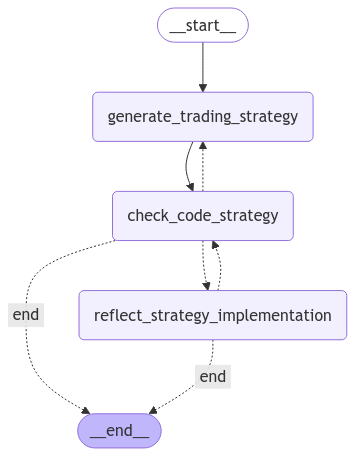

In [20]:
from IPython.display import Image, display
from langgraph.graph import END, StateGraph

# Define the graph
builder = StateGraph(GraphState)

# Define the nodes
builder.add_node("generate_trading_strategy", generate)  # generation solution
builder.add_node("check_code_strategy", code_check)  # check code
builder.add_node("reflect_strategy_implementation", code_reflection)

# Build graph
builder.set_entry_point("generate_trading_strategy")
builder.add_edge("generate_trading_strategy", "check_code_strategy")
builder.add_conditional_edges(
    "check_code_strategy",
    decide_to_reflect_or_finish,
    {
        "reflect_strategy_implementation": "reflect_strategy_implementation",
        "end": END,
        "generate_trading_strategy": "generate_trading_strategy",
    },
)
builder.add_conditional_edges(
    "reflect_strategy_implementation",
    decide_to_finish_from_reflect,
    {
        "end": END,
        "check_code_strategy": "check_code_strategy",
    },
)

graph = builder.compile()
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

# Chat with the Agent

*************
messages ==> messages length:  1
message 0
Propose a momentum trading strategy implementation.
*************
messages ==> [HumanMessage(content='Propose a momentum trading strategy implementation.', additional_kwargs={}, response_metadata={}, id='a31cf338-7ca7-4dd1-afa3-062e06c25806')]
*************
iterations ==> 0
*************
not_reflect_anymore ==> no
---GENERATING CODE SOLUTION---
*************
messages ==> messages length:  3
message 2
Here is my attempt to implement your trading strategy: This code implements a momentum trading strategy using the Relative Strength Index (RSI) and Moving Averages. The strategy buys when the RSI is below 30 and the short-term moving average crosses above the long-term moving average. It sells when the RSI is above 70 and the short-term moving average crosses below the long-term moving average. 
 Imports: import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt 
 Code: # Download historical data
st

[*********************100%***********************]  1 of 1 completed


---CODE BLOCK CHECK: FAILED---
---DECISION: RE-TRY GENERATE CODE---
*************
error==>yes
*************
messages ==> messages length:  5
message 4
Your solution failed the code execution test: Cannot set a DataFrame with multiple columns to the single column Strategy_Returns) Reflect on this error and your prior attempt to solve the problem. (1) State what you think went wrong with the prior solution and (2) try to solve this problem again. Return the FULL SOLUTION. Use the code tool to structure the output with a prefix, imports, and code block:
*************
messages ==> [HumanMessage(content='Propose a momentum trading strategy implementation.', additional_kwargs={}, response_metadata={}, id='a31cf338-7ca7-4dd1-afa3-062e06c25806'), AIMessage(content="Here is my attempt to implement your trading strategy: This code implements a momentum trading strategy using the Relative Strength Index (RSI) and Moving Averages. The strategy buys when the RSI is below 30 and the short-term movin

[*********************100%***********************]  1 of 1 completed

*************
error==>yes
*************
messages ==> messages length:  7
message 6
Here is my attempt to implement your trading strategy: This code implements a momentum trading strategy using the Relative Strength Index (RSI) and Moving Averages. The strategy buys when the RSI is below 30 and the short-term moving average crosses above the long-term moving average. It sells when the RSI is above 70 and the short-term moving average crosses below the long-term moving average. 1) The error occurred because the code was trying to set a DataFrame with multiple columns to a single column 'Strategy_Returns'. This is not allowed in pandas. 2) To fix this, I will calculate the strategy returns for each row individually and then assign the results to the 'Strategy_Returns' column. 
 Imports: import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt 
 Code: # Download historical data
stock = 'AAPL'
data = yf.download(stock, start='2020-01-01', end='2023-01-01'

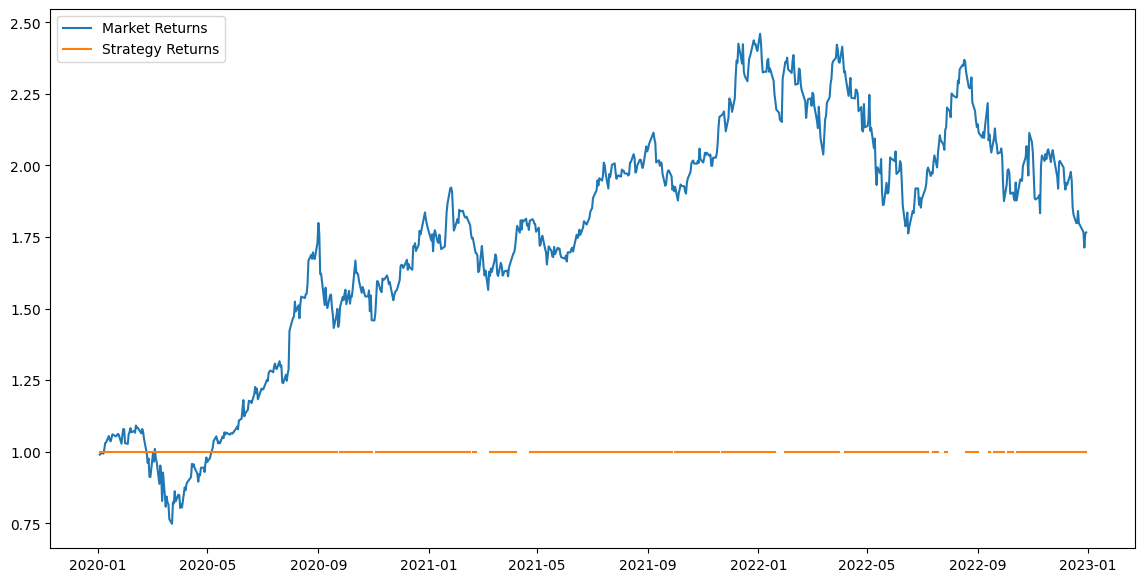

<string>:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
<string>:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


Market Return: 76.63%
Strategy Return: 0.00%
---NO CODE TEST FAILURES---
---DECISION: REFLECTION---
*************
error==>no
*************
messages ==> messages length:  7
message 6
Here is my attempt to implement your trading strategy: This code implements a momentum trading strategy using the Relative Strength Index (RSI) and Moving Averages. The strategy buys when the RSI is below 30 and the short-term moving average crosses above the long-term moving average. It sells when the RSI is above 70 and the short-term moving average crosses below the long-term moving average. 1) The error occurred because the code was trying to set a DataFrame with multiple columns to a single column 'Strategy_Returns'. This is not allowed in pandas. 2) To fix this, I will calculate the strategy returns for each row individually and then assign the results to the 'Strategy_Returns' column. 
 Imports: import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt 
 Code: # Dow

[*********************100%***********************]  1 of 1 completed

---DECISION: RE-TRY CODE CHECK AFTER REFLECTION---
*************
error==>no
*************
messages ==> messages length:  9
message 8
Here is my attempt to reflect on the strategy implementation: This code implements a momentum trading strategy using the Relative Strength Index (RSI) and Moving Averages. The strategy buys when the RSI is below 30 and the short-term moving average crosses above the long-term moving average. It sells when the RSI is above 70 and the short-term moving average crosses below the long-term moving average. The code has been corrected to ensure that the strategy returns are calculated correctly for each row individually and assigned to the 'Strategy_Returns' column. 
 Imports: import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt 
 Code: # Download historical data
stock = 'AAPL'
data = yf.download(stock, start='2020-01-01', end='2023-01-01')

# Calculate indicators
short_window = 40
long_window = 100

# Calculate short-ter

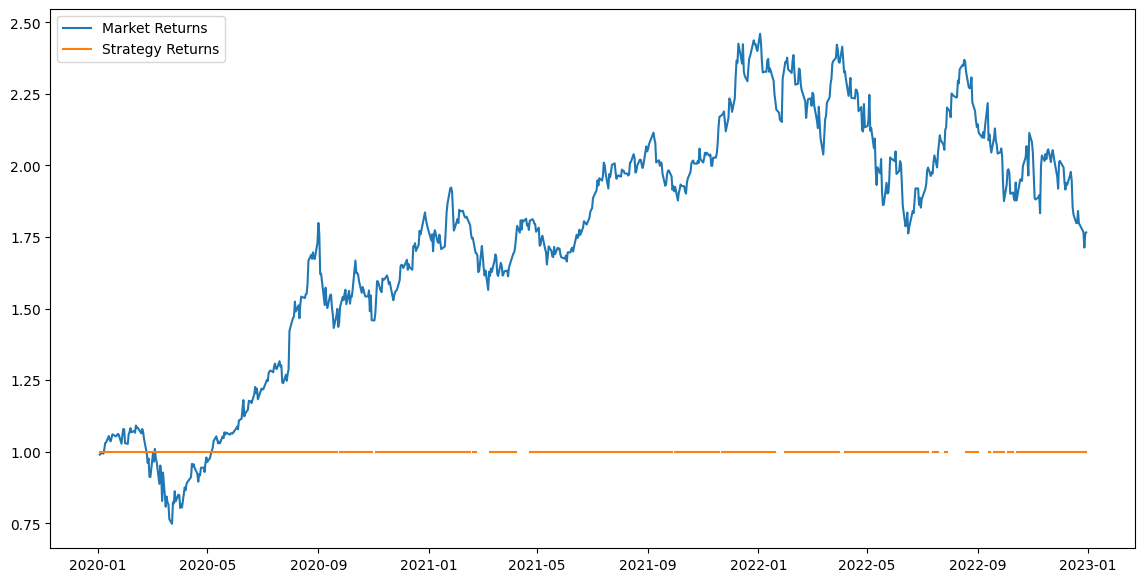

Market Return: 76.63%
Strategy Return: 0.00%
---NO CODE TEST FAILURES---
---DECISION: END AFTER REFLECTION + CODE_CHECK ---
*************
error==>no
*************
messages ==> messages length:  9
message 8
Here is my attempt to reflect on the strategy implementation: This code implements a momentum trading strategy using the Relative Strength Index (RSI) and Moving Averages. The strategy buys when the RSI is below 30 and the short-term moving average crosses above the long-term moving average. It sells when the RSI is above 70 and the short-term moving average crosses below the long-term moving average. The code has been corrected to ensure that the strategy returns are calculated correctly for each row individually and assigned to the 'Strategy_Returns' column. 
 Imports: import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt 
 Code: # Download historical data
stock = 'AAPL'
data = yf.download(stock, start='2020-01-01', end='2023-01-01')

# Calcul

<string>:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
<string>:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [21]:
from langchain_core.messages import HumanMessage
question = "Propose a momentum trading strategy implementation."
for event in graph.stream({"messages": [HumanMessage(content=question)], "iterations": 0, 'not_reflect_anymore': "no"}, stream_mode="values"):
    for k, v in event.items():
      if k=="messages":
        print("*************")
        print(k,"==> messages length: ", len(event['messages']))
        l = len(event['messages'])
        print(f"message {l-1}")
        print(event['messages'][l-1].content)
      if k =="error":
        print("*************")
        if v=="yes":
          print(f"\033[91m{k}==>{v}\033[0m")
        if v=="no":
          print(f"\033[92m{k}==>{v}\033[0m")
      else:
        print("*************")
        print(k,"==>", v)


## Key Takeaways:

* The first loop between the strategy implementation code and the execution code verification was accurate.

* However, we can see the coomputation of the strategy return is not correct especially in the graph. This must be resolved with the reflection node, which has the instructions to check all the computations .... The strategy return is still 0%.

* The reflection did not change anything to the code!

## Manual Correction

The correction needed to be included in "Strategy_Returns" block, as the dataframe has multiIndex column `data['Close'].pct_change().iloc[i]` gives a pandas series and not a value

In [101]:
data['Close'].pct_change().iloc[i]

,2022-12-30
Ticker,
AAPL,0.002469


[*********************100%***********************]  1 of 1 completed


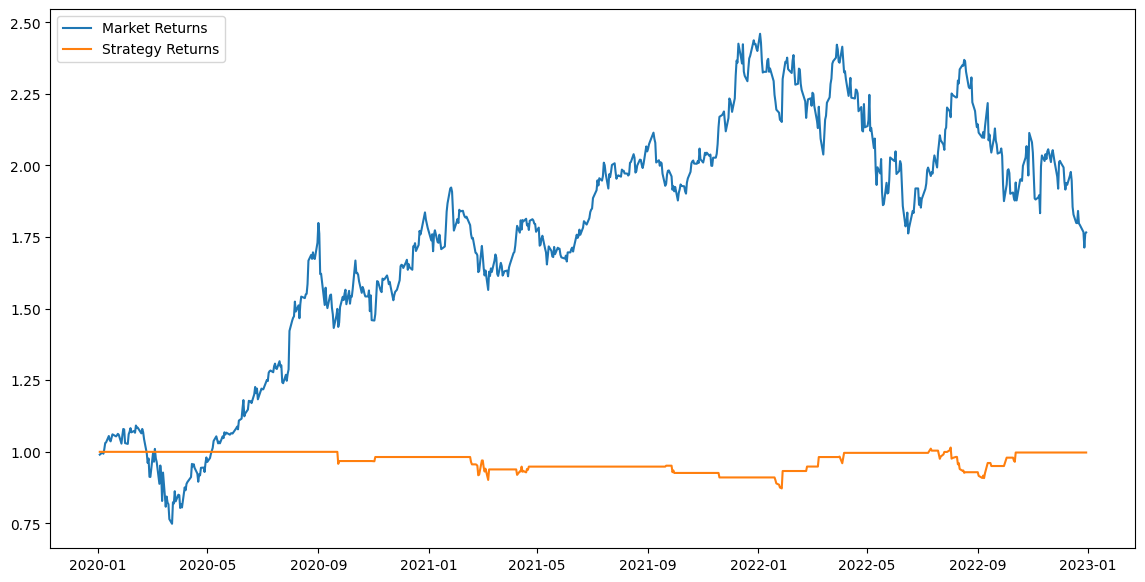

Market Return: 76.63%
Strategy Return: -0.23%


<ipython-input-47-3f7f5829486c>:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_return = (data['Cumulative_Market_Returns'][-1] - 1) * 100
<ipython-input-47-3f7f5829486c>:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  strategy_return = (data['Cumulative_Strategy_Returns'][-1] - 1) * 100


In [47]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
#  Code: # Download historical data
stock = 'AAPL'
data = yf.download(stock, start='2020-01-01', end='2023-01-01')

# Calculate indicators
short_window = 40
long_window = 100

# Calculate short-term and long-term moving averages
data['SMA_Short'] = data['Close'].rolling(window=short_window).mean()
data['SMA_Long'] = data['Close'].rolling(window=long_window).mean()

# Calculate RSI
delta = data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
data['RSI'] = rsi

# Generate trading signals
data['Signal'] = 0.0

# Buy signal
data.loc[(data['RSI'] < 30) & (data['SMA_Short'] > data['SMA_Long']), 'Signal'] = 1.0

# Sell signal
data.loc[(data['RSI'] > 70) & (data['SMA_Short'] < data['SMA_Long']), 'Signal'] = -1.0

# Generate positions
data['Position'] = data['Signal'].shift(1)

# data['Close'].pct_change()

# data['Strategy_Returns'] = (data['Position'] * data['Close'].pct_change()).iloc[:, 0]

# Calculate strategy returns
for i in range(1, len(data)):
    if data['Position'].iloc[i] == 1:
        data.loc[data.index[i], 'Strategy_Returns'] = data['Close'].pct_change().iloc[i].values[0]
    elif data['Position'].iloc[i] == -1:
        data.loc[data.index[i], 'Strategy_Returns'] = -data['Close'].pct_change().iloc[i].values[0]
    else:
        data.loc[data.index[i], 'Strategy_Returns'] = 0

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Close'].pct_change()).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Market_Returns'], label='Market Returns')
plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.legend()
plt.show()

# Print final returns
market_return = (data['Cumulative_Market_Returns'][-1] - 1) * 100
strategy_return = (data['Cumulative_Strategy_Returns'][-1] - 1) * 100
print(f'Market Return: {market_return:.2f}%')
print(f'Strategy Return: {strategy_return:.2f}%')

## Another Implemntation:

In [ ]:
from langchain_core.messages import HumanMessage
question = "Propose a momentum trading strategy implementation."
for event in graph.stream({"messages": [HumanMessage(content=question)], "iterations": 0, 'not_reflect_anymore': "no"}, stream_mode="values"):
    for k, v in event.items():
      if k=="messages":
        print("*************")
        print(k,"==>")
        print(event['messages'][0].content)
        if len(event['messages'])>1:
          print(event['messages'][1].content)
      if k =="error":
        print("*************")
        if v=="yes":
          print(f"\033[91m{k}==>{v}\033[0m")
        if v=="no":
          print(f"\033[92m{k}==>{v}\033[0m")
      else:
        print("*************")
        print(k,"==>", v)


*************
messages ==>
Propose a momentum trading strategy implementation.
*************
messages ==> [HumanMessage(content='Propose a momentum trading strategy implementation.', additional_kwargs={}, response_metadata={}, id='07c0eeb4-2697-40e4-90f6-5ed39debb161')]
*************
iterations ==> 0
*************
not_reflect_anymore ==> no
---GENERATING CODE SOLUTION---
*************
messages ==>
Propose a momentum trading strategy implementation.
Here is my attempt to implement your trading strategy: This code implements a momentum trading strategy using the Relative Strength Index (RSI) and Moving Averages. The strategy buys when the RSI is above 50 and the short-term moving average crosses above the long-term moving average, indicating a bullish momentum. It sells when the RSI is below 50 and the short-term moving average crosses below the long-term moving average, indicating a bearish momentum. 
 Imports: import pandas as pd
import numpy as np
import yfinance as yf
import matplotl

# Rework Reflection instructions:

In [105]:
def code_reflection(state: GraphState):
    """
    Reflect on the quality of the strategy's code

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, error
    """

    print("---REFLECTING ON STRATEGY IMPLEMENTATION---")

    # State
    messages = state["messages"]
    code_solution = state["generation"]
    iterations = state["iterations"]
    not_reflect_anymore = state["not_reflect_anymore"]

    # Get solution components
    prefix = code_solution.prefix
    imports = code_solution.imports
    code = code_solution.code

    # Check execution
    combined_code = f"{imports}\n{code}"
    reflection_message = [("user", f"Reflect on the generated code to ensure the following:\
          (1) Accuracy of computations: Verify that all calculations (e.g., moving averages, differences between moving averages) are correct and align with the requested strategy.\
          (2) Buy and sell signals: Ensure that the signals are computed correctly, thresholds are respected, and the direction (buy or sell) is accurate.\
          (3) Improvements: If any enhancements are needed, propose a Python implementation.\
          (4) If there is no reflection on the code solution already provided meaning that it's accurate, answer only by 'no reflection' in the prefix.\
          (4) Else, meaning if the code need to be modified because it's not accurate, return the explanation and the code reflected.  \
           Use the code tool to structure the output with a prefix, imports, and code block: \n Here is the code to reflect on: {code_solution}")]

    code_reflection = code_gen_mistral_chain.invoke(reflection_message)
    print("code_reflection", code_reflection)

    if code_reflection.prefix =="no reflection":
        return {
            "generation": code_solution,
            "messages": messages,
            "iterations": iterations,
            "reflection": "no",
            "not_reflect_anymore":"yes"
        }
    else:
        messages += [
        (
            "assistant",
            f"Here is my attempt to reflect on the strategy implementation: {code_reflection.prefix} \n Imports: {code_reflection.imports} \n Code: {code_reflection.code}",
        )
        ]
        return {"generation": code_reflection, "messages": messages, "iterations": iterations, "reflection": "yes","not_reflect_anymore":"yes"}

## Recompile the graph

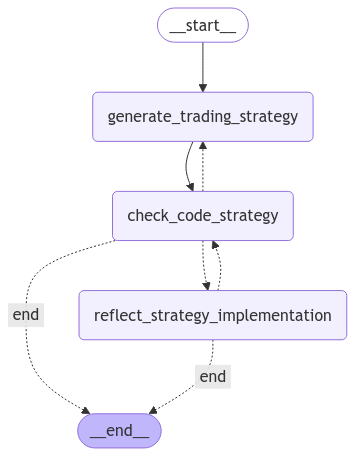

In [109]:
from IPython.display import Image, display
from langgraph.graph import END, StateGraph

# Define the graph
builder = StateGraph(GraphState)

# Define the nodes
builder.add_node("generate_trading_strategy", generate)  # generation solution
builder.add_node("check_code_strategy", code_check)  # check code
builder.add_node("reflect_strategy_implementation", code_reflection)

# Build graph
builder.set_entry_point("generate_trading_strategy")
builder.add_edge("generate_trading_strategy", "check_code_strategy")
builder.add_conditional_edges(
    "check_code_strategy",
    decide_to_reflect_or_finish,
    {
        "reflect_strategy_implementation": "reflect_strategy_implementation",
        "end": END,
        "generate_trading_strategy": "generate_trading_strategy",
    },
)
builder.add_conditional_edges(
    "reflect_strategy_implementation",
    decide_to_finish_from_reflect,
    {
        "end": END,
        "check_code_strategy": "check_code_strategy",
    },
)

graph = builder.compile()
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

*************
messages ==> messages length:  1
message 0
Propose a momentum trading strategy implementation in Python. Do not use ta library.
*************
messages ==> [HumanMessage(content='Propose a momentum trading strategy implementation in Python. Do not use ta library.', additional_kwargs={}, response_metadata={}, id='a468b0c3-fb44-4348-a0be-2d9236ff5075')]
*************
iterations ==> 0
*************
not_reflect_anymore ==> no
---GENERATING CODE SOLUTION---
*************
messages ==> messages length:  3
message 2
Here is my attempt to implement your trading strategy: This code implements a momentum trading strategy using moving averages. It calculates the short-term and long-term moving averages of the stock prices and generates buy/sell signals based on the crossover of these averages. The strategy is designed to capture short-term price movements and avoid long-term trends. 
 Imports: import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
 Code: # Load histor

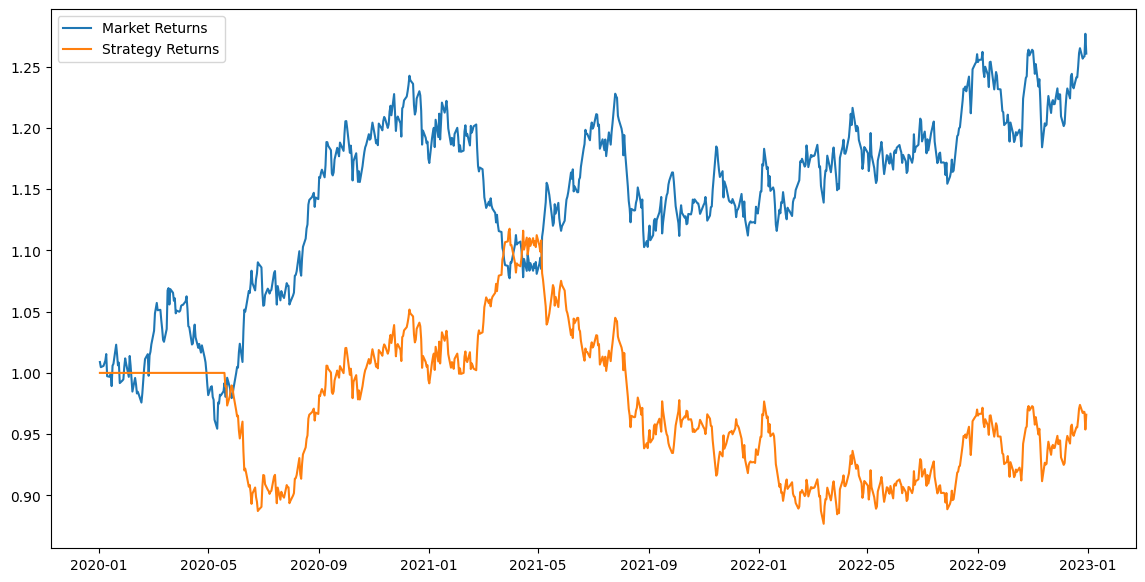

<string>:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
<string>:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


Final Cumulative Market Returns: 1.2607022562699564
Final Cumulative Strategy Returns: 0.9658539162533264
---NO CODE TEST FAILURES---
---DECISION: REFLECTION---
*************
error==>no
*************
messages ==> messages length:  11
message 10
Here is my attempt to implement your trading strategy: This code implements a momentum trading strategy using moving averages. It calculates the short-term and long-term moving averages of the stock prices and generates buy/sell signals based on the crossover of these averages. The strategy is designed to capture short-term price movements and avoid long-term trends. 
 Imports: import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
 Code: # Parameters
short_window = 40
long_window = 100

# Sample data creation for demonstration purposes
# In practice, you would load your data from a CSV file or another source
dates = pd.date_range(start='2020-01-01', end='2023-01-01', freq='B')
data = {
    'Date': dates,
    'Close': np.random.

In [110]:
from langchain_core.messages import HumanMessage
question = "Propose a momentum trading strategy implementation in Python. Do not use ta library."
for event in graph.stream({"messages": [HumanMessage(content=question)], "iterations": 0, 'not_reflect_anymore': "no"}, stream_mode="values"):
    for k, v in event.items():
      if k=="messages":
        print("*************")
        print(k,"==> messages length: ", len(event['messages']))
        l = len(event['messages'])
        print(f"message {l-1}")
        print(event['messages'][l-1].content)
      if k =="error":
        print("*************")
        if v=="yes":
          print(f"\033[91m{k}==>{v}\033[0m")
        if v=="no":
          print(f"\033[92m{k}==>{v}\033[0m")
      else:
        print("*************")
        print(k,"==>", v)

## Key takeaways

By reworking the instructions for the reflection part, the LLM was able to answer with the good wording, enabling escaping generating the same code when it's not needed:

`code_reflection prefix='no reflection'`


